In [2]:
import pandas as pd

data = pd.DataFrame(columns=["path", "label"])
data.head()

,path,label


In [3]:
import os

for (root, dirs, files) in os.walk("./CK+48", topdown=True):    
    try:
        label = root.split("/")[2]

        for file in files:
            path = root+'/'+file
            values = pd.DataFrame([[path, label]], columns=["path", "label"])
            data = pd.concat([data, values], axis=0)
    except IndexError:
        pass

    

In [4]:
data.shape

(981, 2)

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def getImageData(path):
    try:
        image = Image.open(path)
        image = np.array(image)
        return image
    except FileNotFoundError:
        print("File not found")

In [6]:
from sklearn.model_selection import train_test_split

X = np.empty(shape=(1,48,48,1))
y = data['label']

for v in np.array(data.iloc[:,0]):
    im = getImageData(v)
    im = im.reshape(1,48,48,1)
    X = np.append(X, im, axis=0)

X = X[1:]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

b = np.zeros((y.size, y.max()+1))
b[np.arange(y.size), y] = 1

X_train, X_test, y_train, y_test = train_test_split(X,b, test_size=0.2, random_state=0)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, MaxPool2D

cnn = Sequential([
    Conv2D(filters=24,input_shape=[48,48,1], activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=36, activation='relu', kernel_size=3),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(7, activation="softmax")
])

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 24)        240       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 36)        7812      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 36)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3600)              0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [16]:
cnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


2023-01-12 13:29:35.790111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 17ms/step - loss: 14.4641 - accuracy: 0.2296
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 1.3443 - accuracy: 0.5395
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 0.8000 - accuracy: 0.7270
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.3923 - accuracy: 0.8763
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 0.2772 - accuracy: 0.9120
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.1127 - accuracy: 0.9732
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0622 - accuracy: 0.9911
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.9949
Epoch 9/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 10/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0218 - accuracy: 0.9962
Epoch 11/1

In [19]:
y_pred = cnn.predict(X_test)

1/7 [===>..........................] - ETA: 0s

2023-01-12 13:30:41.031184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 35ms/step


In [24]:
le.classes_

array(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness',
       'surprise'], dtype=object)

In [25]:
labels = {0:'anger', 1:'contempt', 2:'disgust', 3:'fear', 4:'happy', 5:'sadness', 6:'suprise'}

In [32]:
def test(index):
    predict = np.argmax(y_pred[index])
    actual = np.argmax(y_test[index])
    print(f"Actual: {labels[actual]}, Prediction: {labels[predict]}")
    plt.imshow(X_test[index], cmap='gray')

Actual: disgust, Prediction: disgust


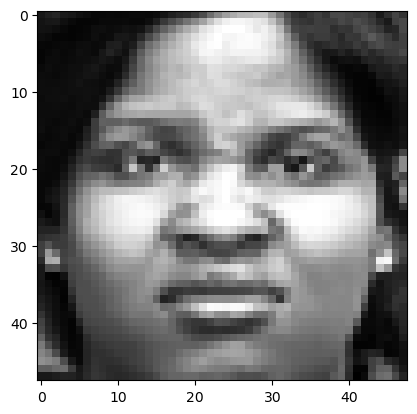

In [34]:
test(69)